<a href="https://colab.research.google.com/github/JunSeokCheon/dacon/blob/master/%ED%95%AD%EA%B3%B5%EC%82%AC_%EA%B3%A0%EA%B0%9D_%EB%A7%8C%EC%A1%B1%EB%8F%84_%EC%98%88%EC%B8%A1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 패키지 설치

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # 카테고리형 데이터를 수치형 데이터로 변환

In [25]:
cd /content/drive/MyDrive/dacon/항공사 고객 만족도 예측/airline_dataset

/content/drive/MyDrive/dacon/항공사 고객 만족도 예측/airline_dataset


1. train.csv : 학습 데이터  
id : 샘플 아이디  
Gender : 성별  
Customer Type : Disloyal 또는 Loyal 고객  
Age : 나이  
Type of Travel : Business 또는 Personal Travel  
Class : 등급  
Flight Distance : 비행 거리  
Seat comfort : 좌석 만족도  
Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도  
Food and drink : 식음료 만족도  
Gate location : 게이트 위치 만족도  
Inflight wifi service : 기내 와이파이 서비스 만족도  
Inflight entertainment : 기내 엔터테인먼트 만족도  
Online support : 온라인 지원 만족도  
Ease of Online booking : 온라인 예매 편리성 만족도  
On-board service : 탑승 서비스 만족도  
Leg room service : Leg room 서비스 만족도  
Baggage handling : 수하물 처리 만족도  
Checkin service : 체크인 서비스 만족도  
Cleanliness : 청결도 만족도  
Online boarding : 온라인보딩 만족도  
Departure Delay in Minutes : 출발 지연 시간  
Arrival Delay in Minutes : 도착 지연 시간  
target : 만족 여부  
  
  
2. test.csv : 테스트 데이터  
id : 샘플 아이디  
Gender : 성별  
Customer Type : Disloyal 또는 Loyal 고객  
Age : 나이  
Type of Travel : Business 또는 Personal Travel  
Class : 등급  
Flight Distance : 비행 거리  
Seat comfort : 좌석 만족도  
Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도  
Food and drink : 식음료 만족도  
Gate location : 게이트 위치 만족도  
Inflight wifi service : 기내 와이파이 서비스 만족도  
Inflight entertainment : 기내 엔터테인먼트 만족도  
Online support : 온라인 지원 만족도  
Ease of Online booking : 온라인 예매 편리성 만족도  
On-board service : 탑승 서비스 만족도  
Leg room service : Leg room 서비스 만족도  
Baggage handling : 수하물 처리 만족도  
Checkin service : 체크인 서비스 만족도  
Cleanliness : 청결도 만족도  
Online boarding : 온라인보딩 만족도  
Departure Delay in Minutes : 출발 지연 시간  
Arrival Delay in Minutes : 도착 지연 시간  
  
  
3. sample_submissoin.csv : 제출 양식  
id : 샘플 아이디  
target : 만족 여부 (1 - 만족, 0 - 불만족)

In [27]:
# csv를 DataFrame 형식으로 불러온다.
data = pd.read_csv("train.csv")

# id는 인덱스와 같기 때문에 제외
data = data.drop('id', axis = 1)
pd.set_option('display.max_columns', None) # 컬럼수가 요약되어 표시되지 않고 전체를 보기 위함
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


카테고리형 데이터 : Gender, Customer Type, Type of Travel, Class는 텍스트로 구성  
위 카테고리형 데이터를 제외한 feature들은 모두 수치형 데이터  
수치형 데이터 중 Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes을 제외한 나머지 feature들은  
0~5 사이의 정도? 만족도? 를 나타내는 정수형 데이터이다.

# 결측치 확인

In [28]:
def check_missing_col(dataframe):
  missing_col = []
  for col in dataframe.columns:
    missing_values = sum(dataframe[col].isna()) # isna() : 데이터프레임 내에 결측 값을 확인하여, 그 결과를 True 또는 False로 반환
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      print(f'결측치가 있는 컬럼은: {col} 입니다')
      print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
      missing_col.append([col, dataframe[col].dtype])
  if missing_col == []:
    print("결측치가 존재하지 않습니다")
  return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


해당 데이터셋은 결측치가 존재하지 않는다.(보기드문 좋은 데이터셋)

# 기초 통계 분석

In [30]:
# 기초 통계량 분석
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


In [32]:
# 전체의 데이터 타입
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
target    

### feature 분포 시각화

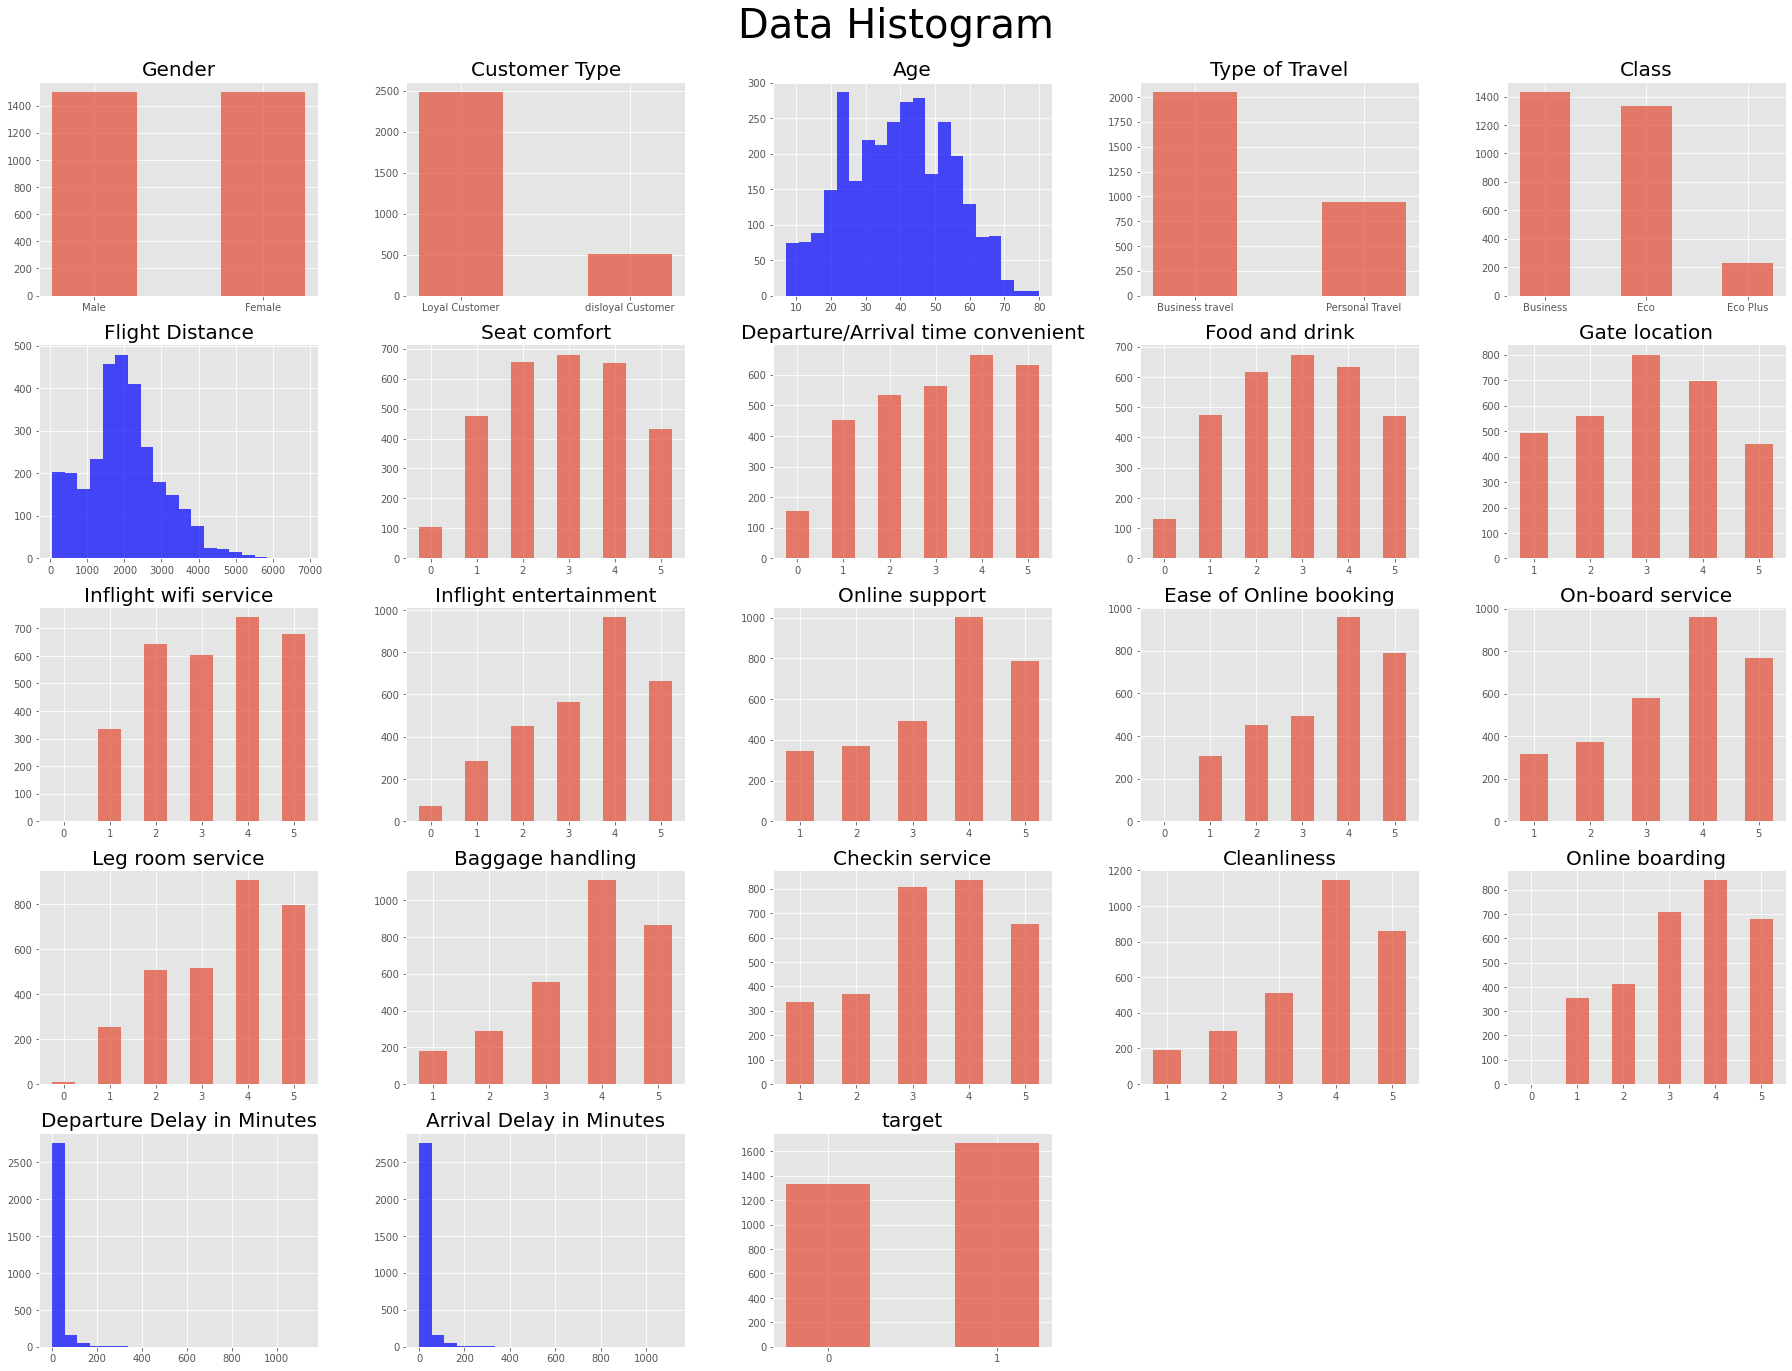

In [35]:
plt.style.use("ggplot") # matplotlib stylesheet

# 히스토그램을 사용해서 데이터의 분포를 확인
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외
cols = data.columns
for i in range(len(cols)):
  plt.subplot(5,5,i+1)
  plt.title(cols[i], fontsize = 20)
  if len(data[cols[i]].unique()) > 20: # 유일 값 개수 임의의 20개로 설정 -> Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 표현
    plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7) # bins - 가로축 구간의 개수, color - 색, alpha - 투명도(0-1)
  else:
    temp = data[cols[i]].value_counts() # temp(key value Series)
    plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
    plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 여백 설정
plt.show()


### 특이 사항
*   나이는 정규분포의 형태를 이룬다.
*   성별은 남녀 비율이 비슷하다
*   Age를 제외한 연속형 변수들이 왼쪽으로 치우쳐져 있다.
*   target은 밸런스가 적당하다.(imbalance는 아니다)
*   loyal/disloyal 비율이 loyal customer가 더 많다.

## target과 fature의 관계
범주형 데이터(Gender, Customer Type, Type of Travel, Class)의 카테고리에 따른 target feature의 분포를 살펴본다.  
범주형 데이터는 막대, 원 그래프를 사용하는 것이 일반적이나 연속형 데이터에 자주 사용하는 바이올릿 그래프를 사용한다.  
왜냐하면 카테고리값에 따른 각 분포의 실제 데이터 또는 전체 형상을 보여준다는 장점이 있기 때문에 사용할 예정이다.

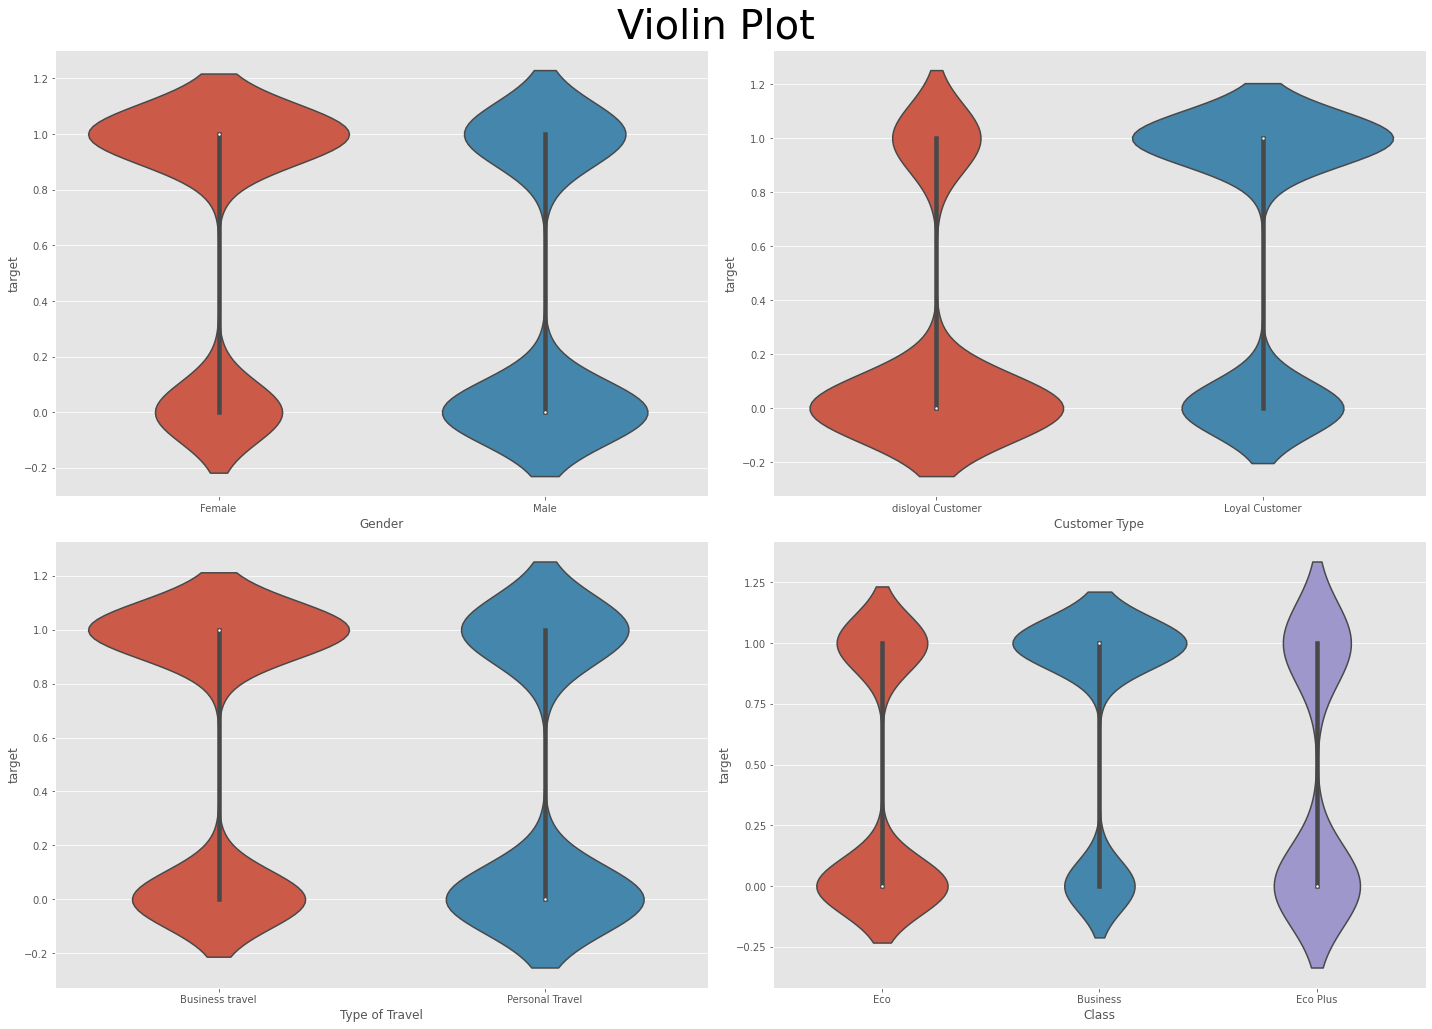

In [36]:
target = "target"

# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes =='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

for i in range(len(categorical_feature)):
  plt.subplot(2,2,i+1)
  plt.xlabel(categorical_feature[i])
  plt.ylabel(target)
  sns.violinplot(x=data[categorical_feature[i]], y=data[target])
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

바이올릿 플롯을 보니 Customer Type 변수에서 disloyal/loyal의 만족도 차이가 상당히 많이 난다는 것을 알 수 있다.  
해당 변수가 중요하다는 것을 알 수 있다.  
범주형 데이터를 분석해보았으니 다음은 수치형 데이터의 분포를 확인하기 위해 박스플롯을 그린다.

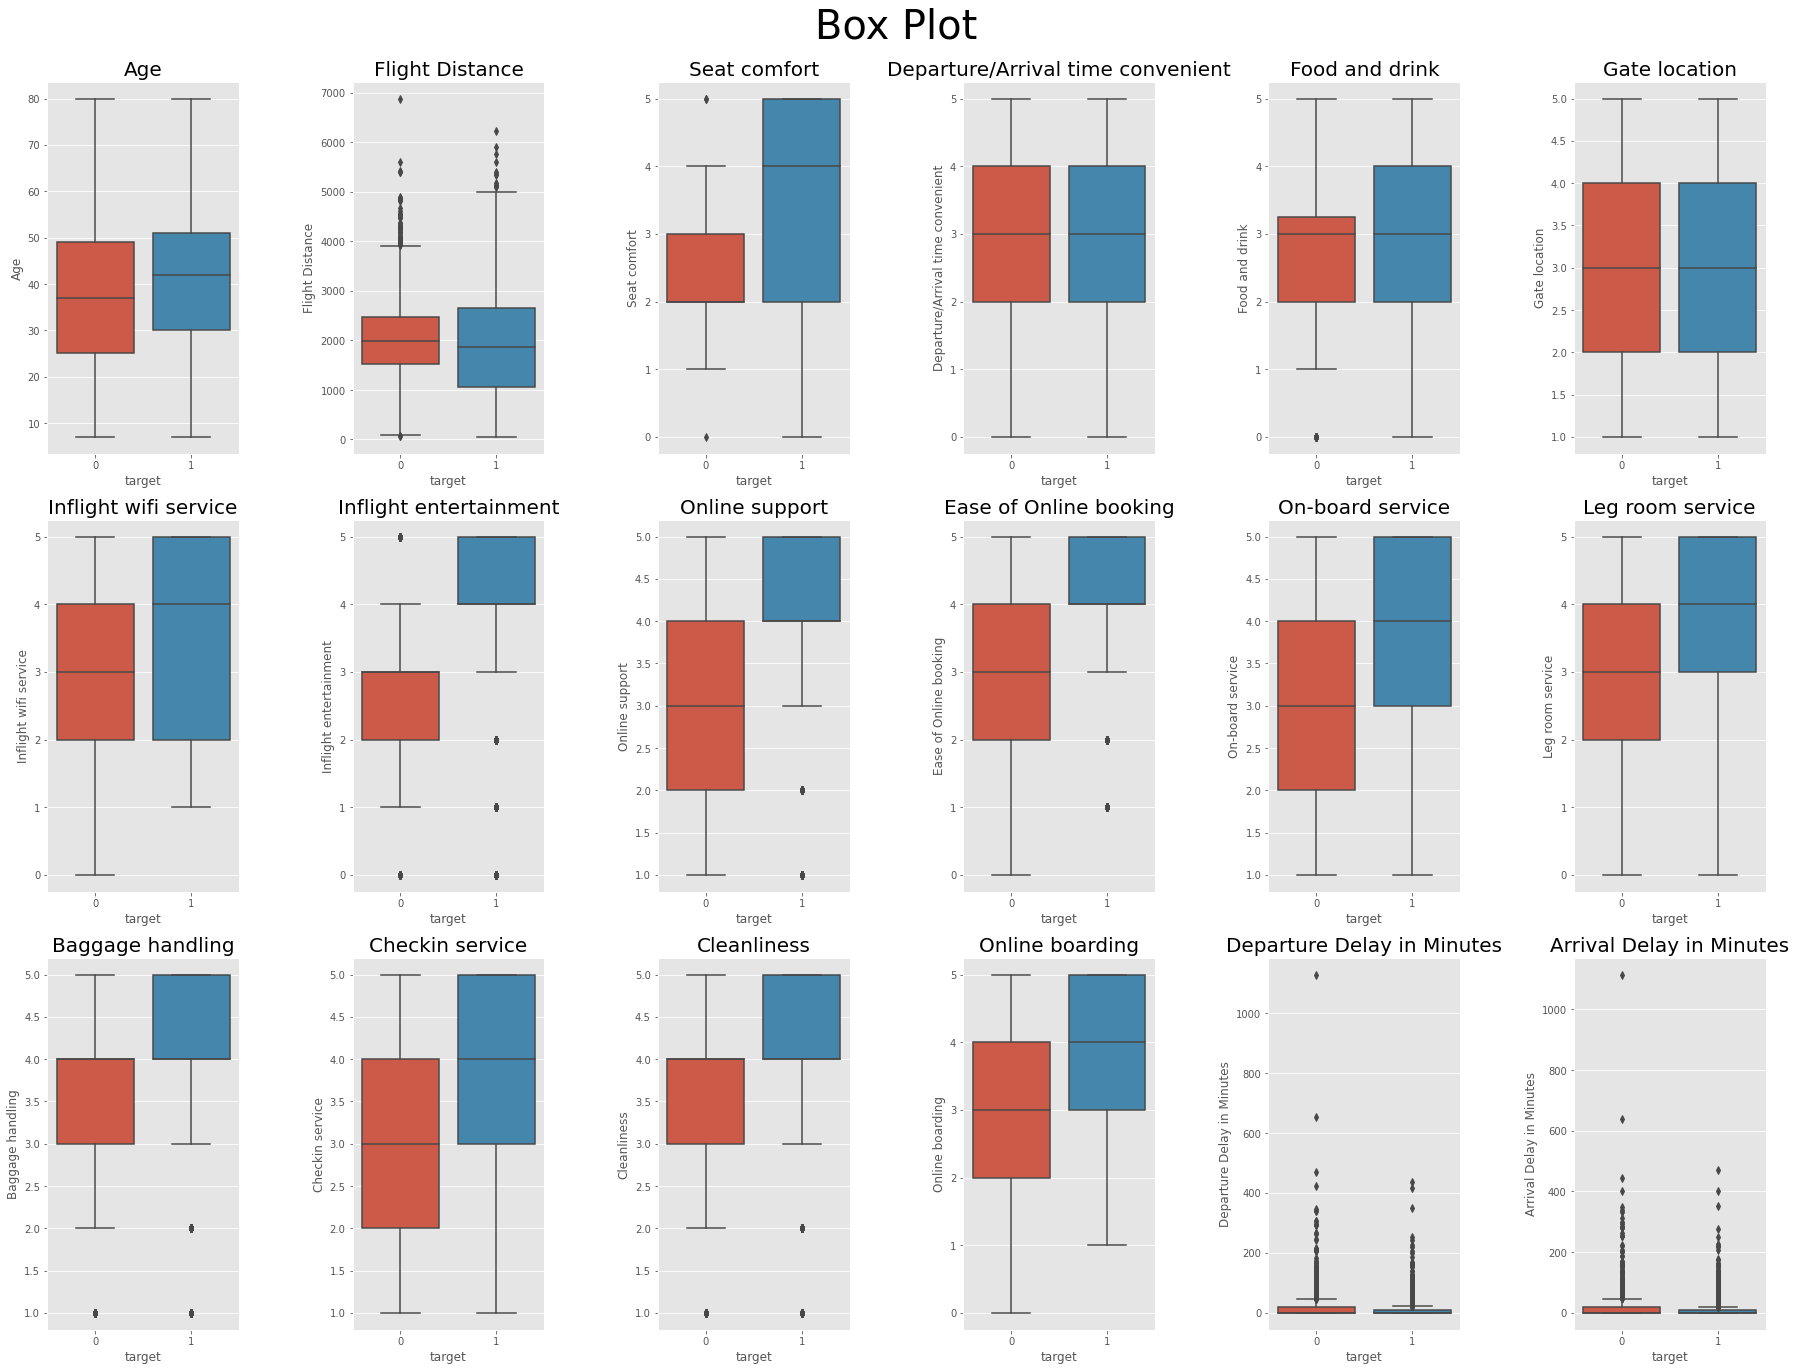

In [39]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스 플롯
fig, axes = plt.subplots(3,6,figsize=(25,20))

fig.suptitle('Box Plot', fontsize=40)
for ax, col in zip(axes.flat, num_data.columns[:-1]): # axes.flat : 각 하위 plot / num_data.columns[:-1] : 각각의 columns 
  sns.boxplot(x= 'target', y=col, ax=ax, data=num_data)
  ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Departure/Arrival time convenient, age, gate location과 같은 변수는  target에 영향을 끼치지 않는다.  
왜냐하면 특이점도 없고, 최대/최소값의 boundary가 똑같고 중앙값도 비슷해서 target 결정할만한 핵심 feature가 아니라고 판단되어서 제거 가능하다고 생각한다.

# 상관관계 시각화
feature들간의 상관관계와, feature들과 target의 상관관계를 표현하자

In [40]:
# 먼저 상관계수 계산을 위해서는 텍스트 형식(카테고리형 데이터)의 데이터를 숫자로 변환 HOW? labelencoder를 사용하면 범주형 데이터를 수치형 데이터로 변환가능
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

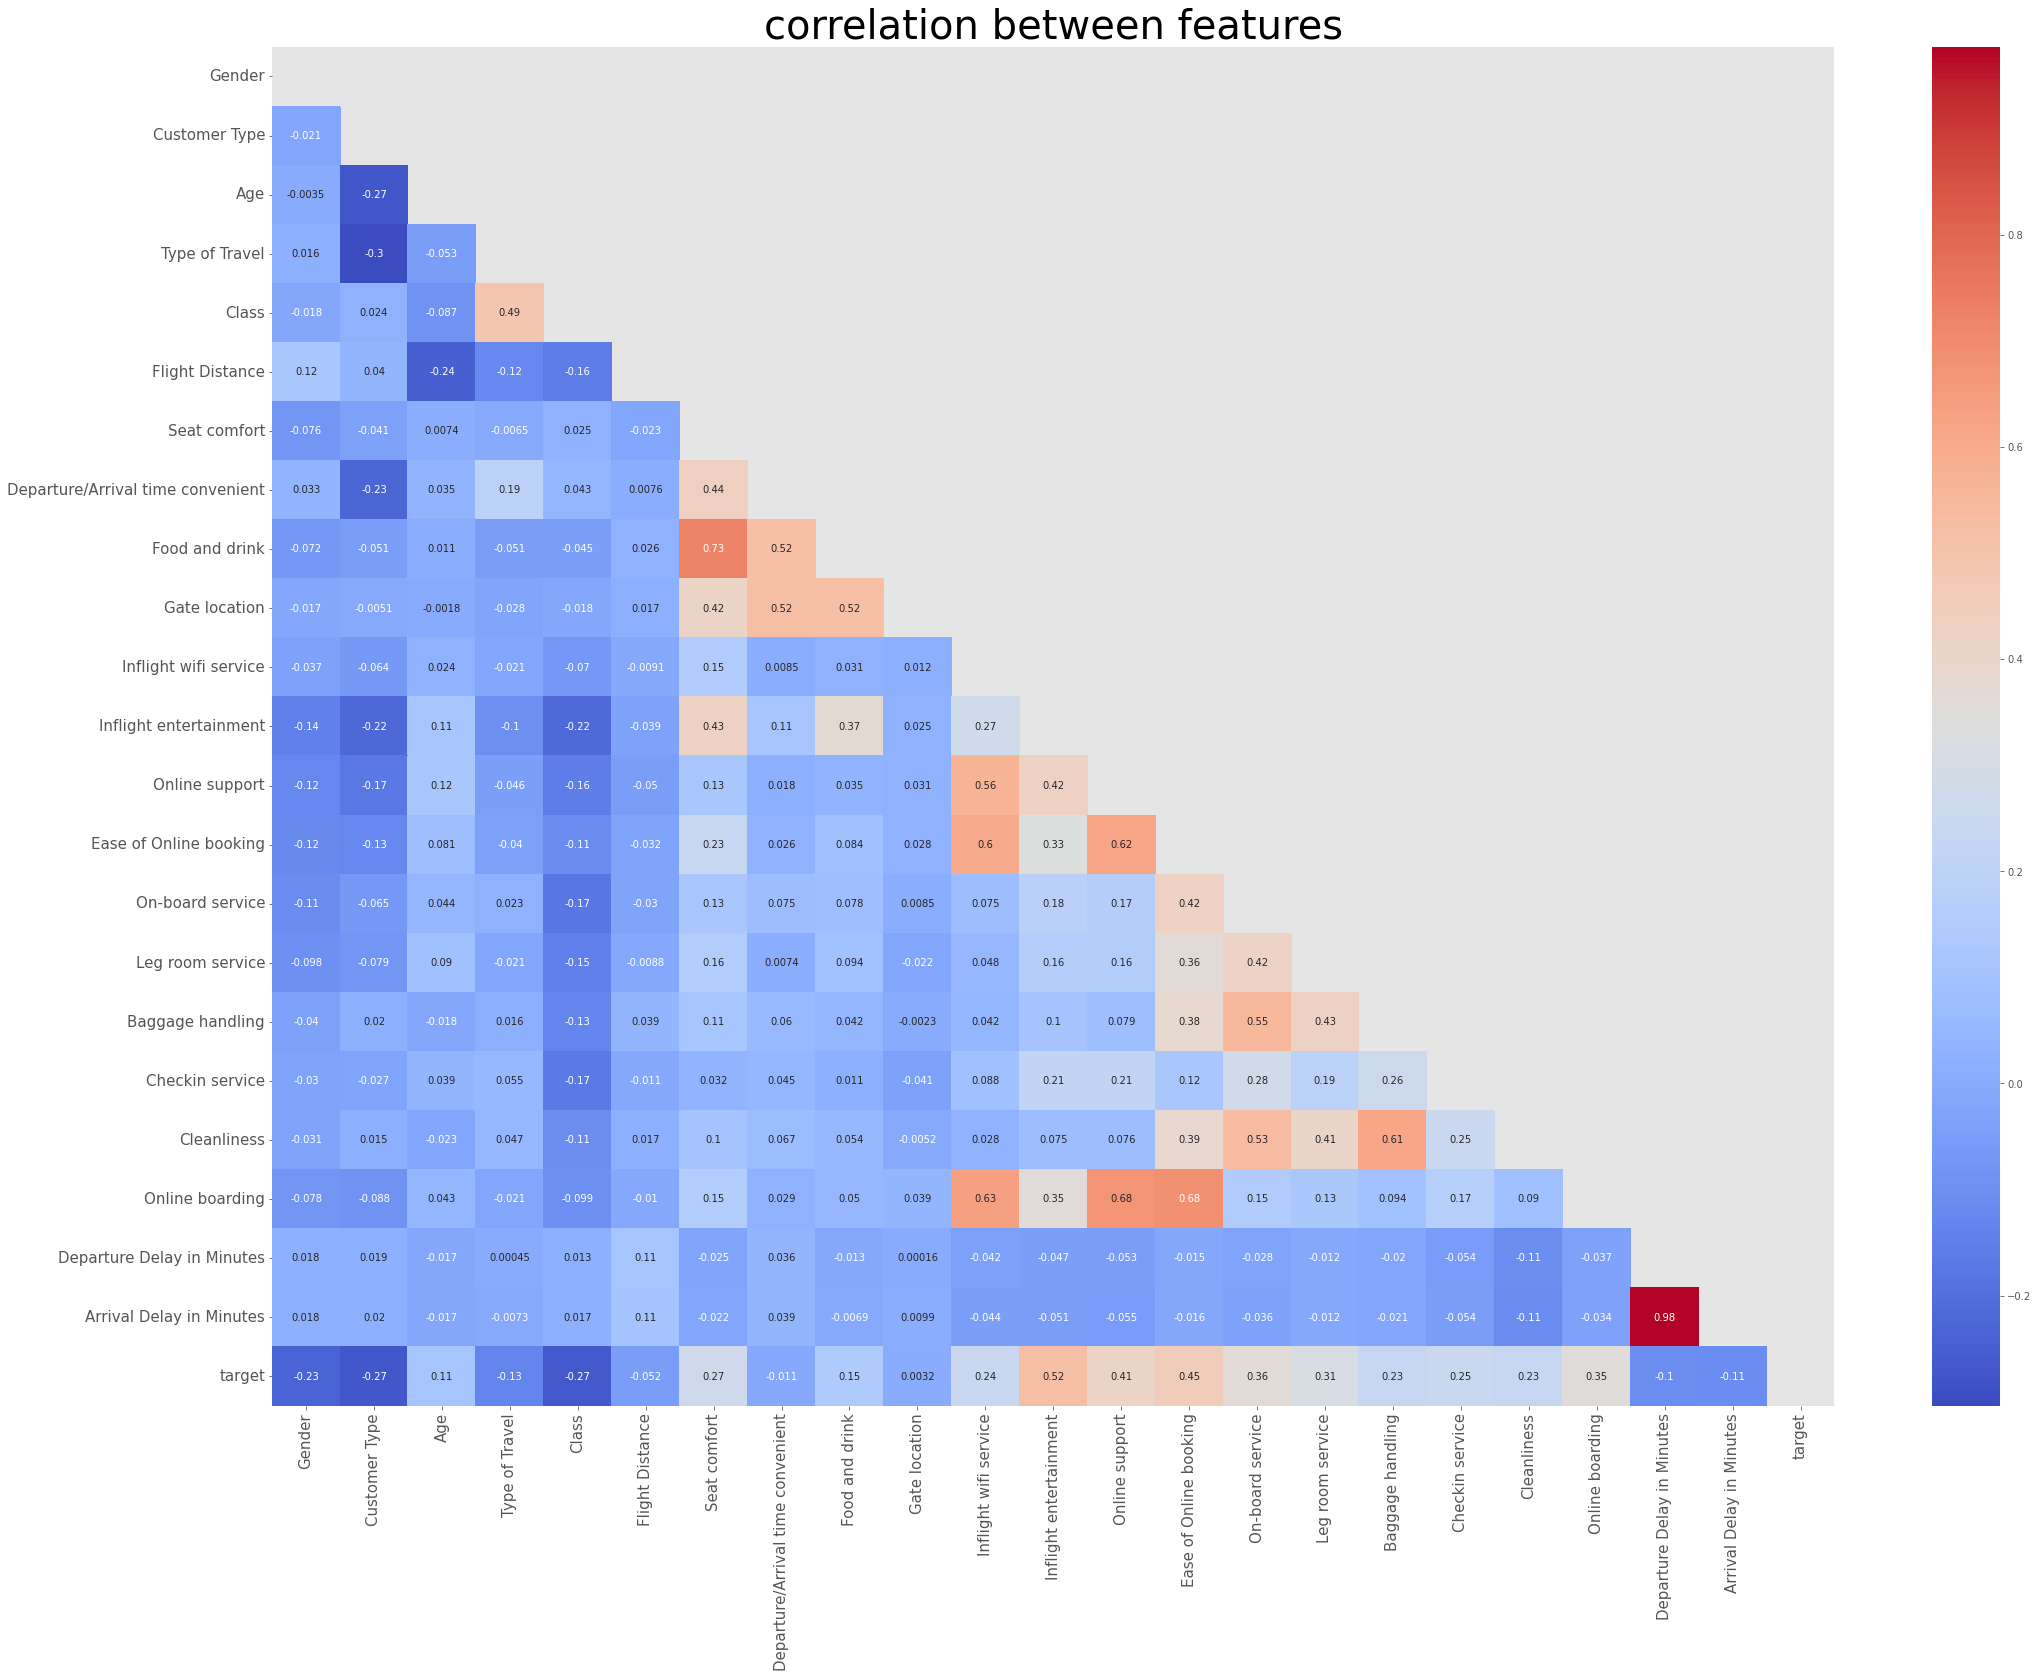

In [43]:
# 상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table) # np.zeros_like : 입력값에 맞는 모양의 0으로 가득찬 array 배출
mask[np.triu_indices_from(mask)] = True # upper-triangle of arr
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm') # annot : 각 셀의 값 표현
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title("correlation between features", fontsize = 40)
plt.show()

맨 아래 고객 만족도인 target은 inflight entertainment와 가장 높은 상관(0.52)를 보인다.  
그리고 Online support, Ease of Online booking 등 와도 높은 상관을 보이는 걸 볼 수 있다.